In [143]:
import pdf2image
import layoutparser as lp
import pytesseract
import numpy as np
import pandas as pd

img = pdf2image.convert_from_path('/Users/prashantgaurav/Projects/KaajAi/Bank-Transaction-Extraction-Analysis/statements/Bank-Statement-Template-2-TemplateLab.pdf')[0]


In [17]:
model1 = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model2 = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model3 = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

model4 = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [18]:
layout_result1 = model1.detect(img)
layout_result2 = model2.detect(img)
layout_result3 = model3.detect(img)
layout_result4 = model4.detect(img)

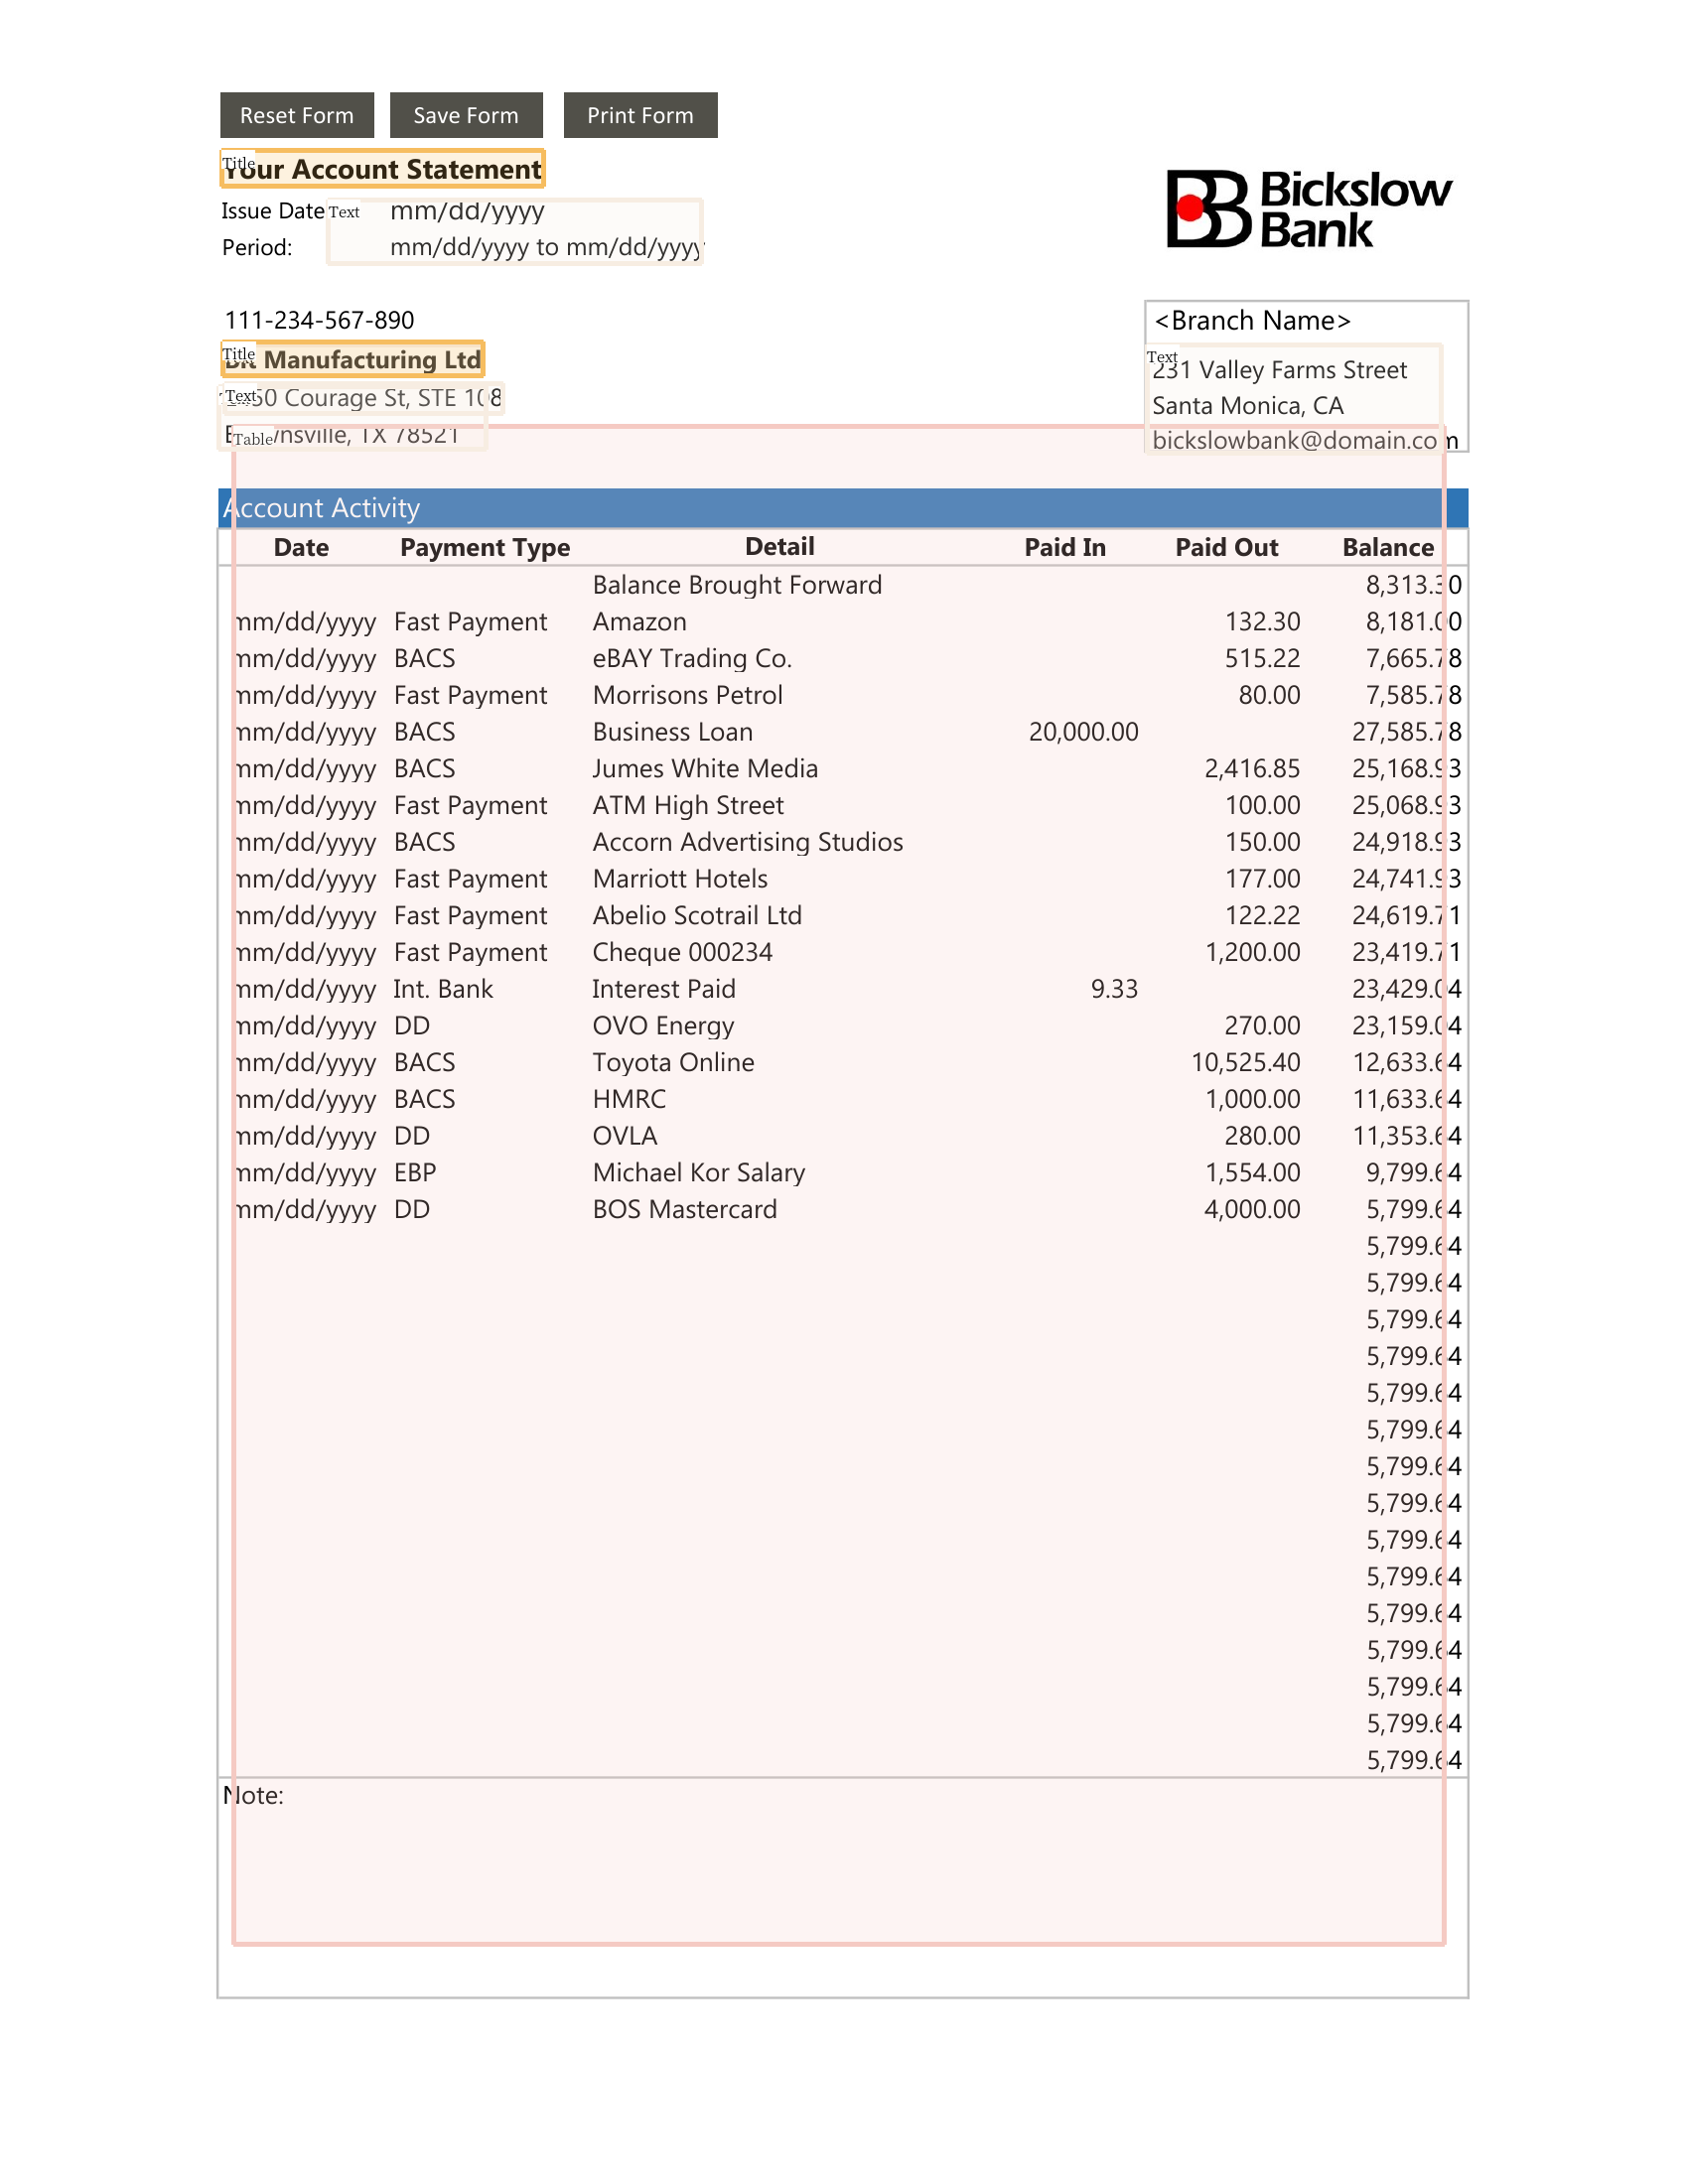

In [76]:
lp.draw_box(img, layout_result1,  box_width=5, box_alpha=0.2, show_element_type=True)

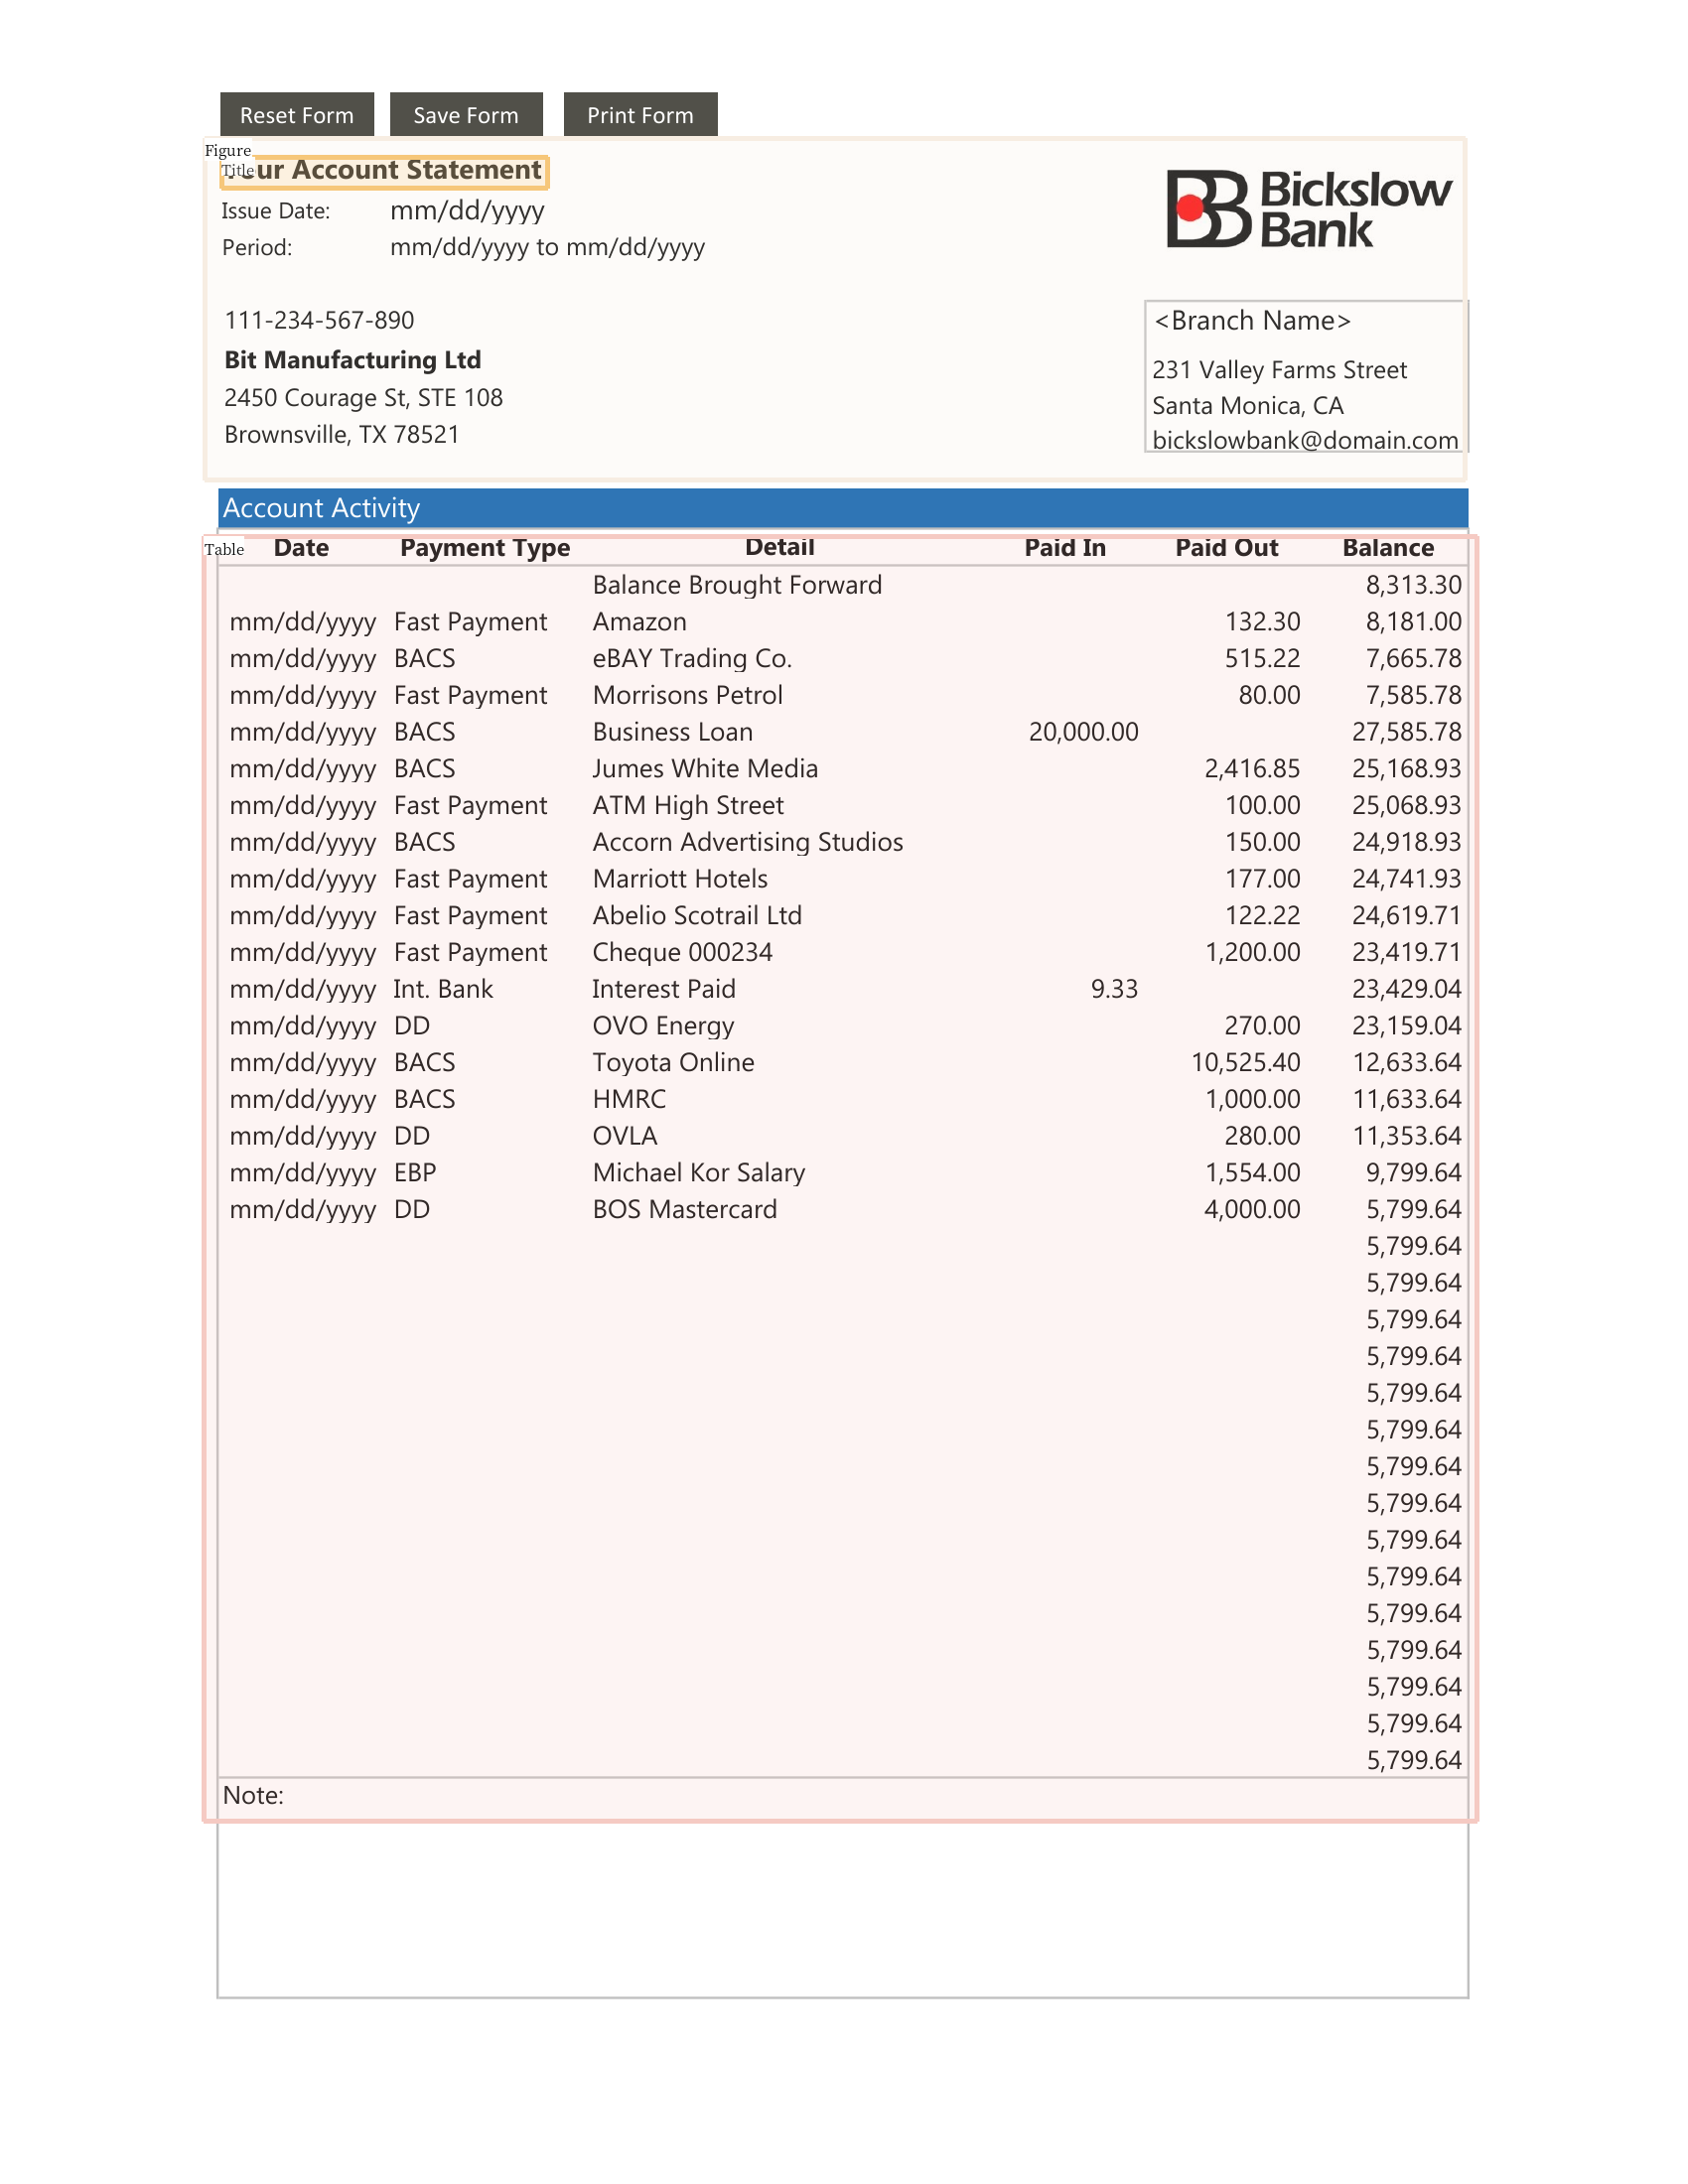

In [22]:
lp.draw_box(img, layout_result2,  box_width=5, box_alpha=0.2, show_element_type=True)

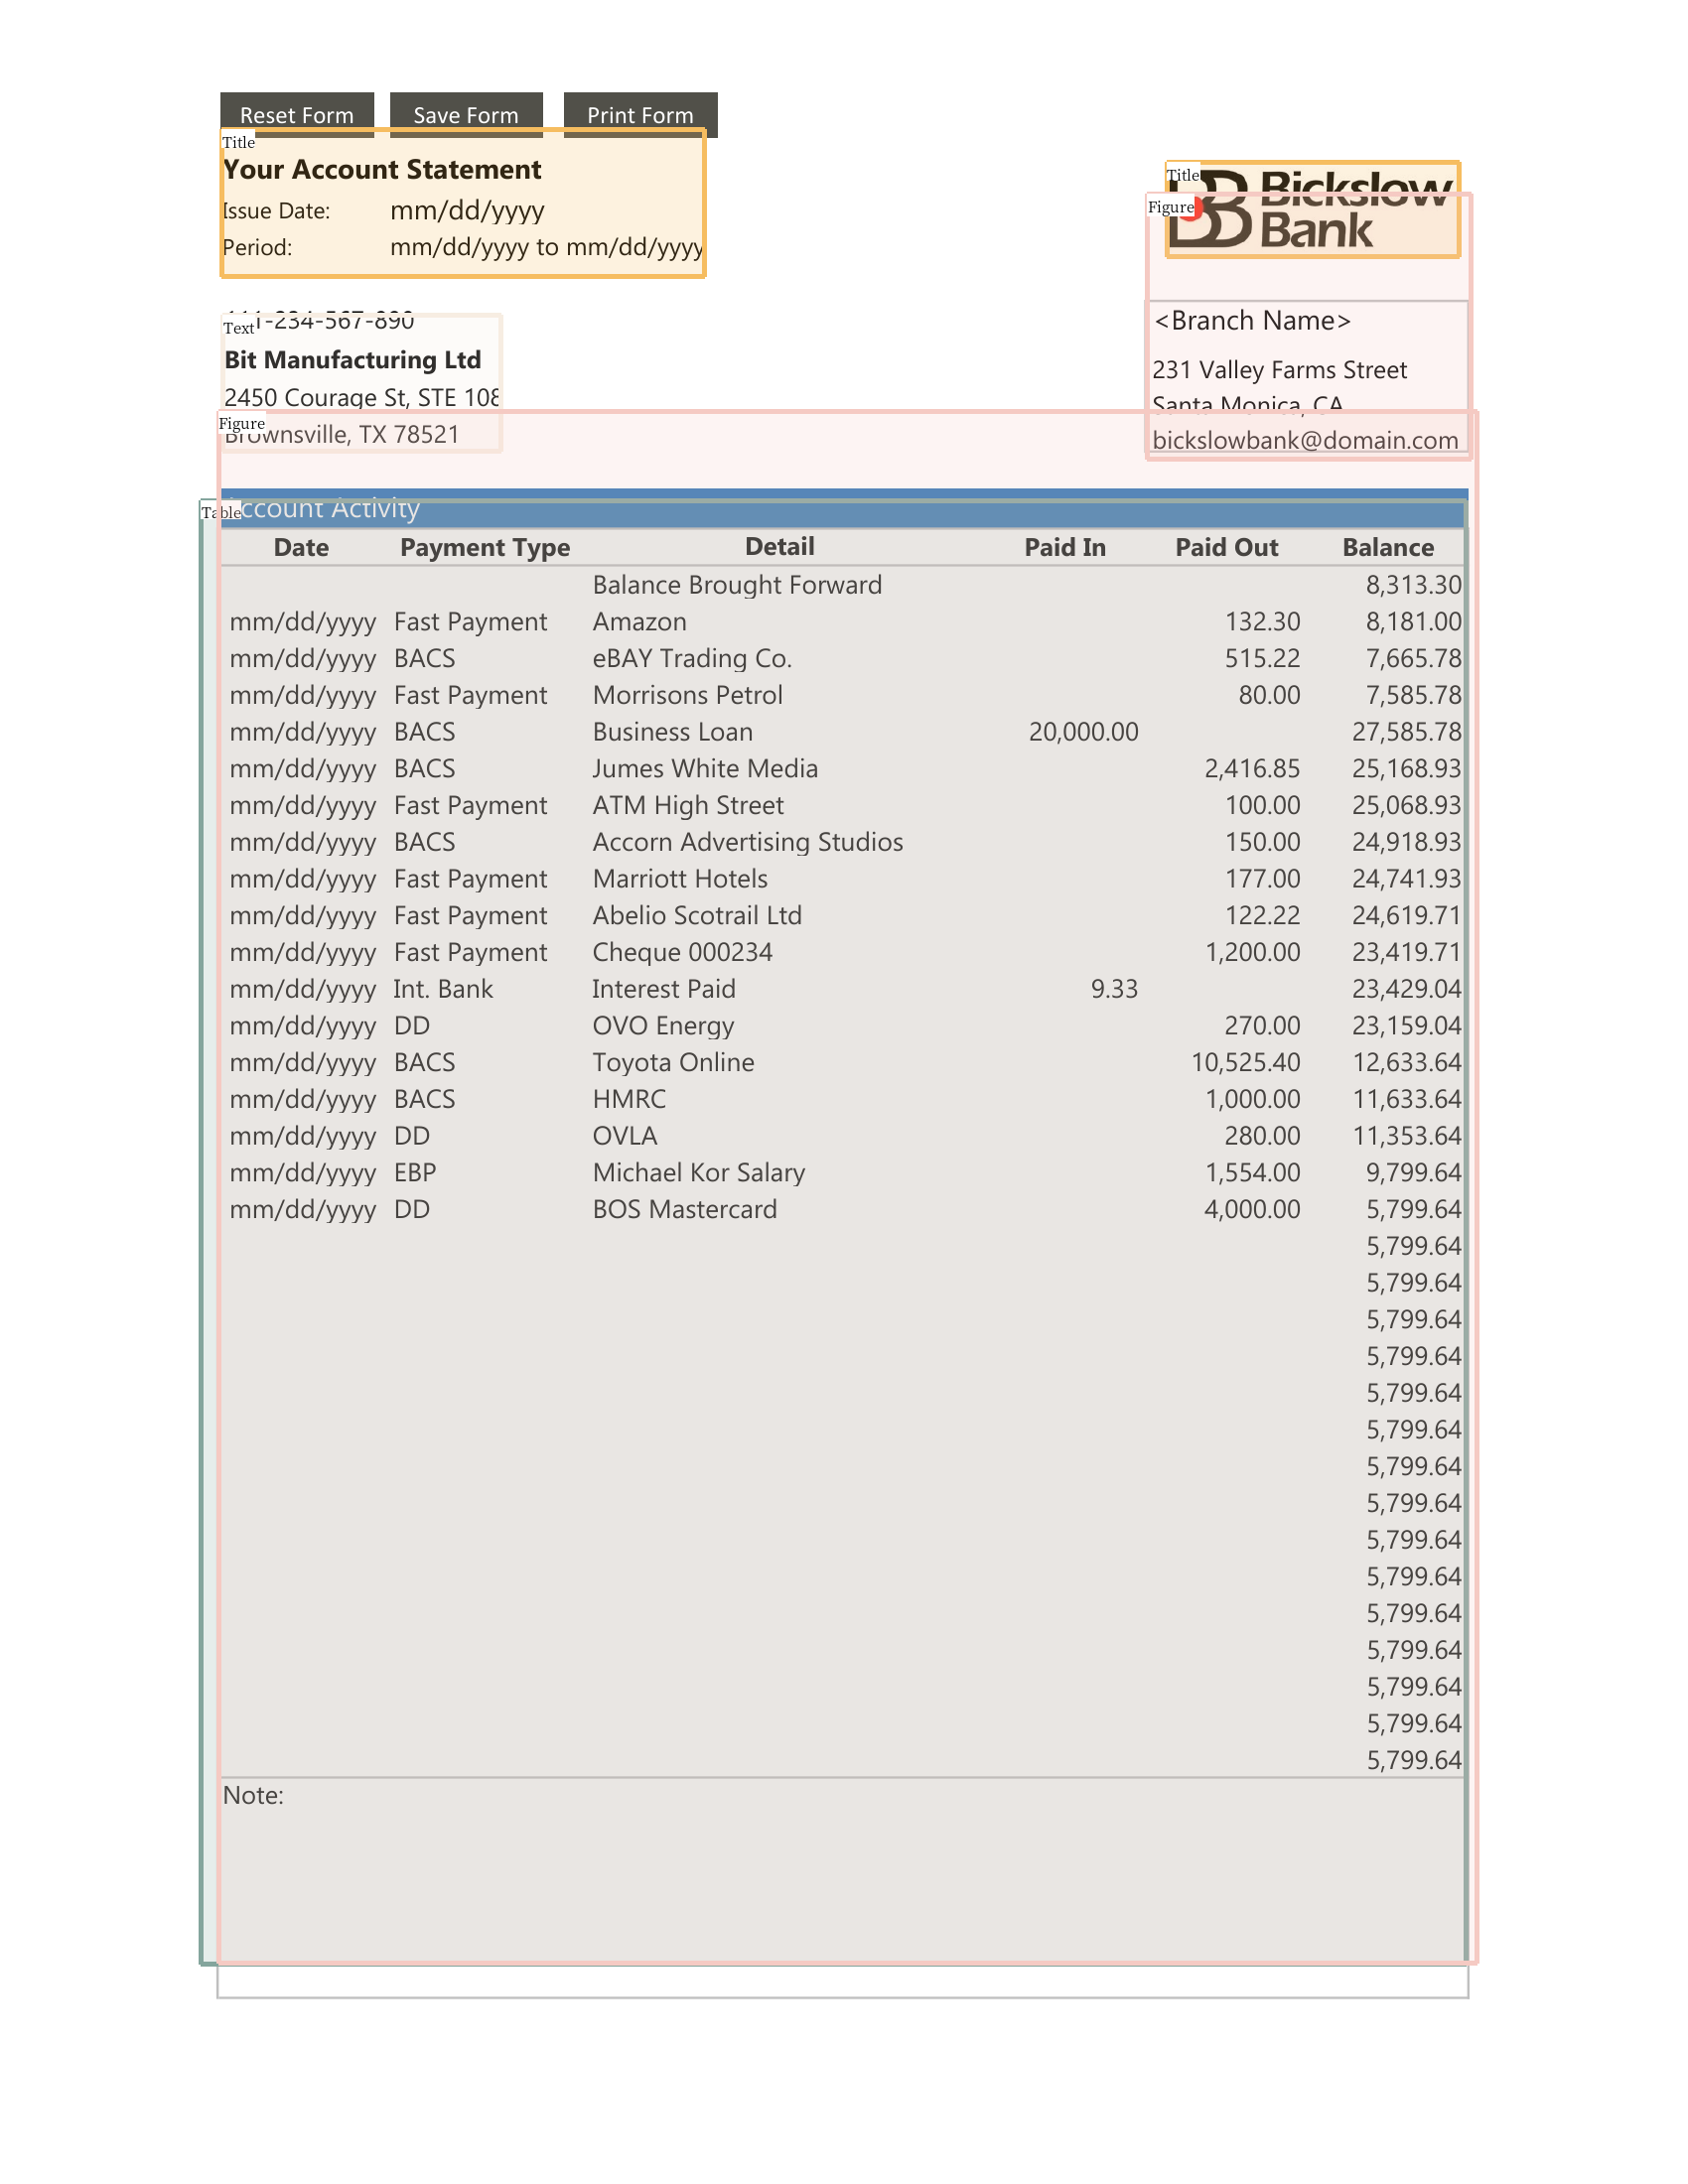

In [23]:
lp.draw_box(img, layout_result3,  box_width=5, box_alpha=0.2, show_element_type=True)

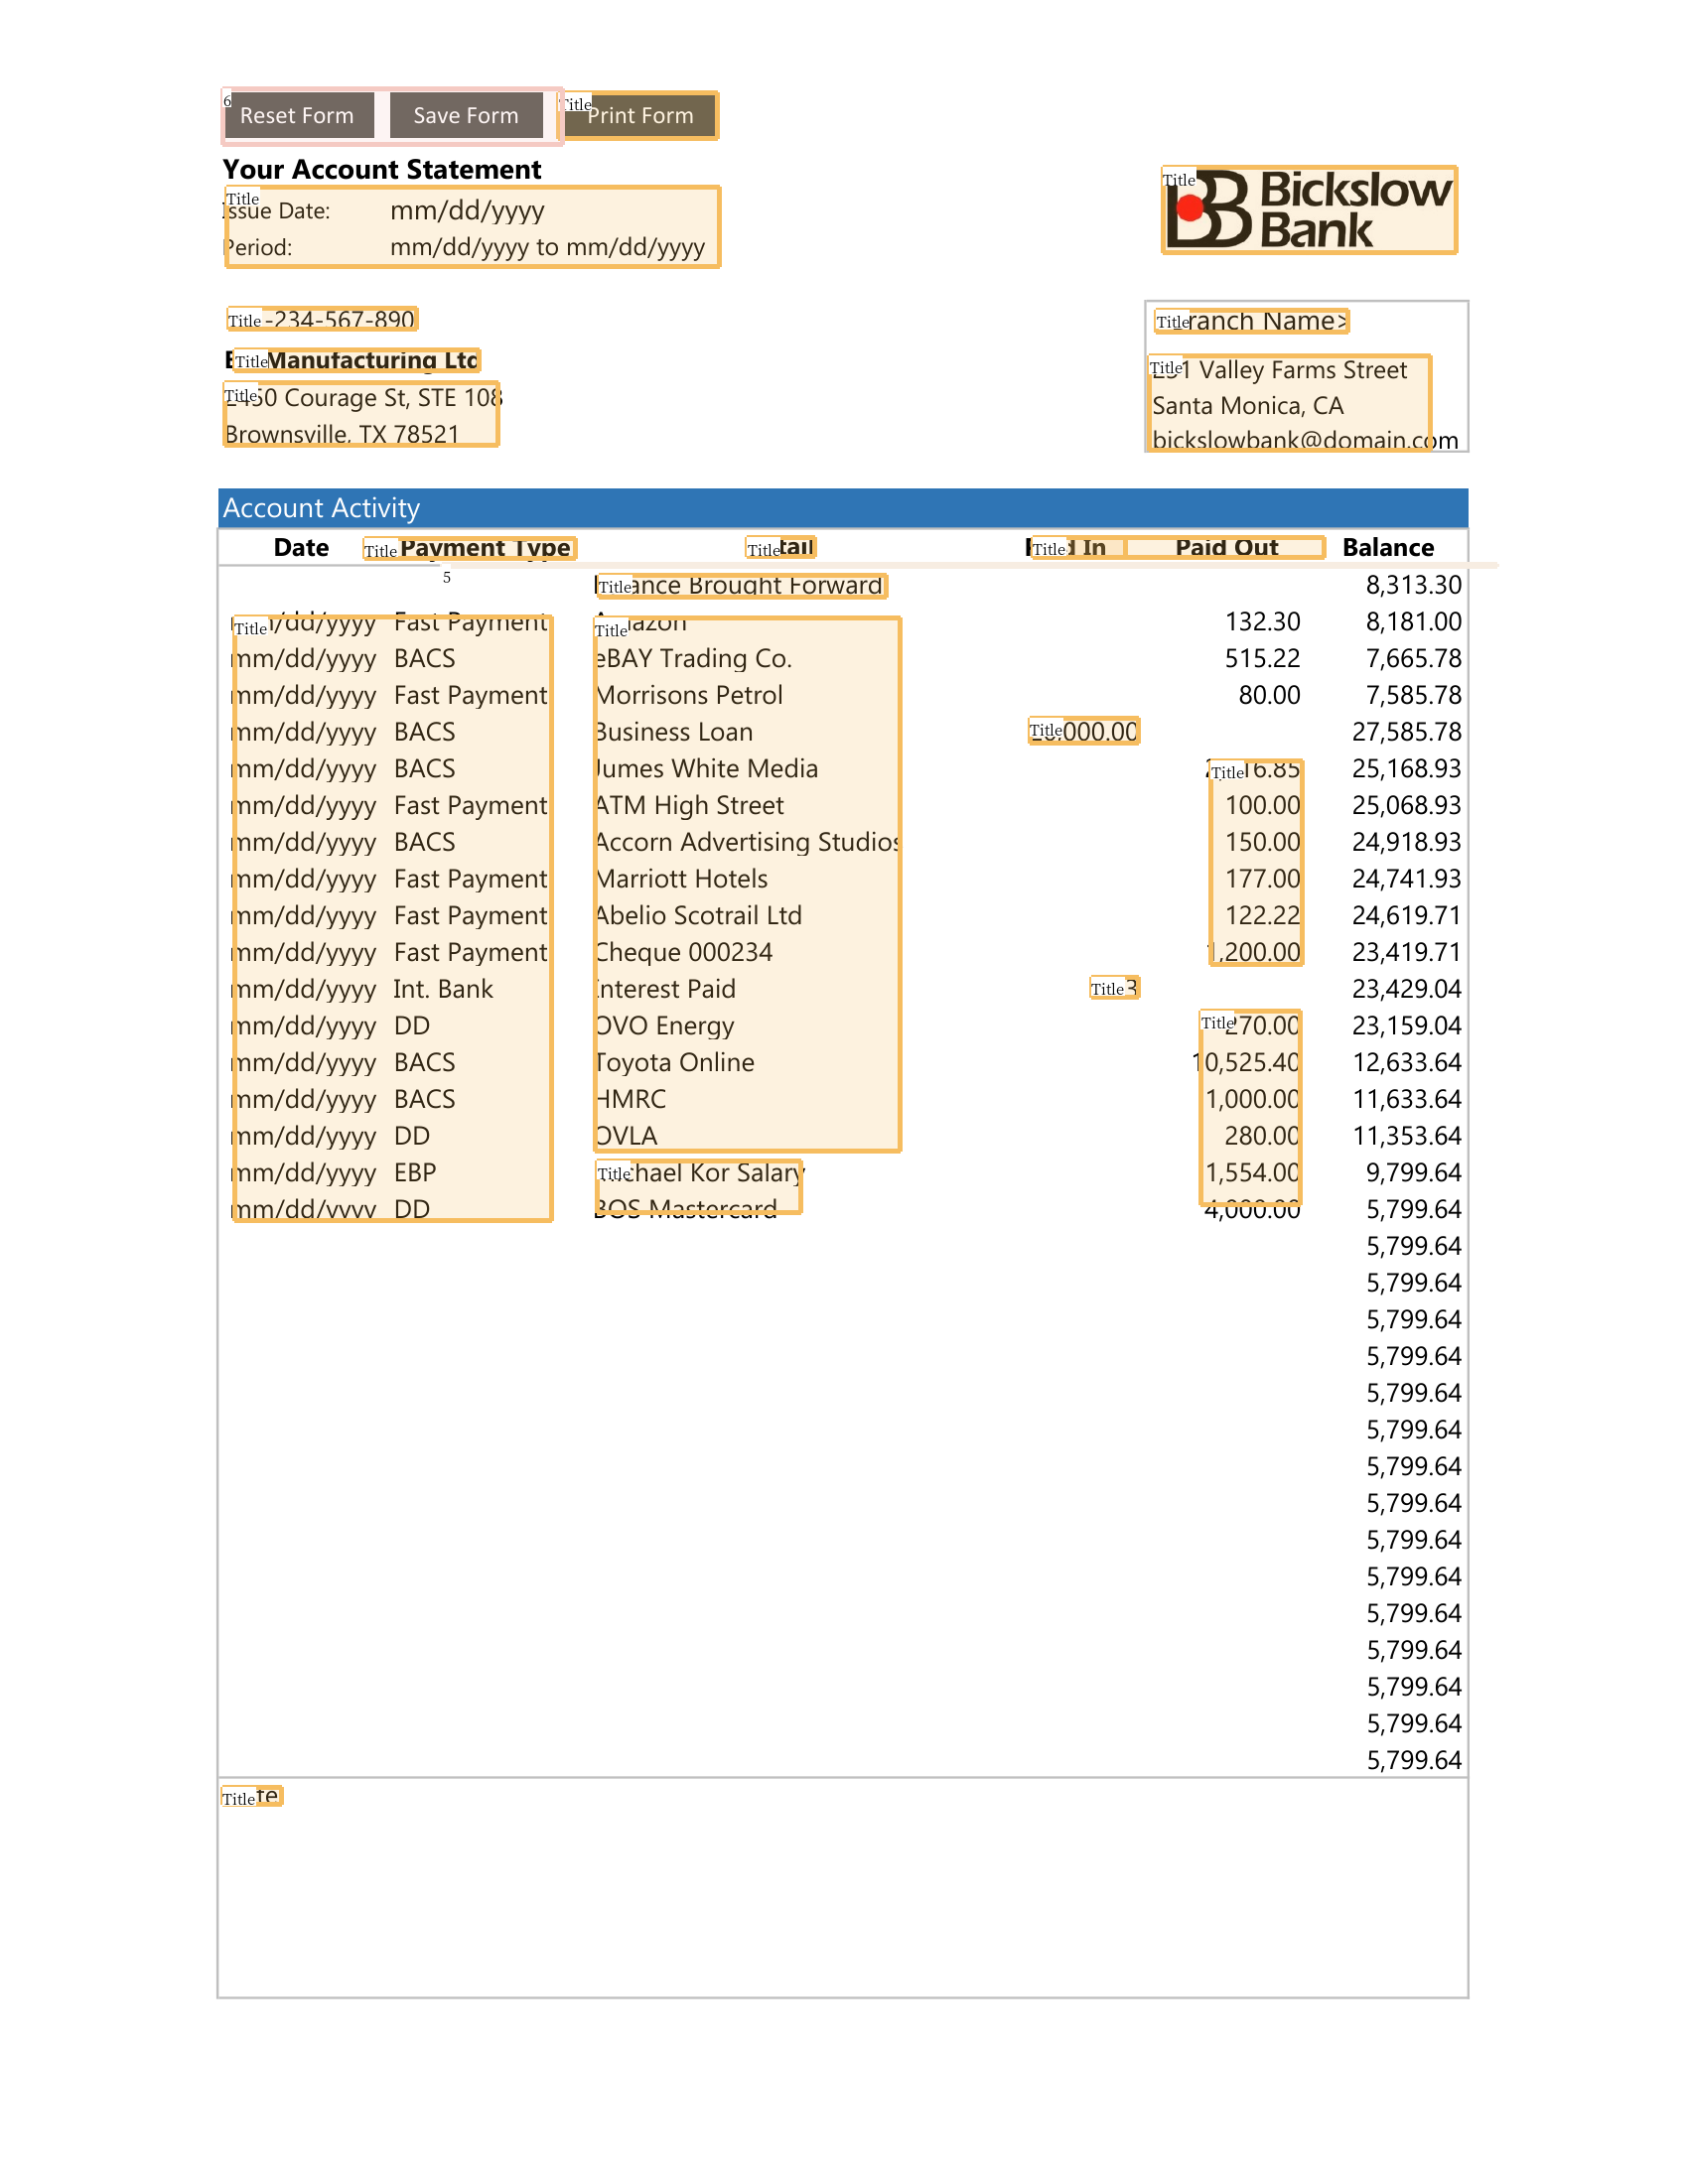

In [24]:
lp.draw_box(img, layout_result4,  box_width=5, box_alpha=0.2, show_element_type=True)

In [83]:
LAYOUT_RESULT = layout_result3
np_img = np.asarray(pdf2image.convert_from_path('/Users/prashantgaurav/Projects/KaajAi/Bank-Transaction-Extraction-Analysis/statements/Bank-Statement-Template-2-TemplateLab.pdf')[0])

In [93]:
pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'  # Adjust the path according to your installation

# Filter for table blocks
table_blocks = lp.Layout([b for b in layout_result3 if b.type == 'Table'])

for j, table_block in enumerate(table_blocks):
    # Extract the table image
    table_image = img.crop(table_block.coordinates)
    
    # Optionally use OCR to extract text from the table image
    table_text = pytesseract.image_to_string(table_image)
    
    print(f"Detected table {j+1}:")
    print(table_text)


Detected table 1:
ACCOUNT ACTIVITY

Date Payment Type Detail Paid In Paid Out Balance

Balance Brought Forward 8,313.30

mm/dd/yyyy Fast Payment Amazon 132.30 8,181.00
mm/dd/yyyy BACS eBAY Trading Co. 515.22 7,665.78
mm/dd/yyyy Fast Payment Morrisons Petrol 80.00 7,585.78
mm/dd/yyyy BACS Business Loan 20,000.00 27,585.78
mm/dd/yyyy BACS Jumes White Media 2,416.85 25,168.93
mm/dd/yyyy Fast Payment ATM High Street 100.00 25,068.93
mm/dd/yyyy BACS Accorn Advertising Studios 150.00 24,918.93
mm/dd/yyyy Fast Payment Marriott Hotels 177.00 24,741.93
mm/dd/yyyy Fast Payment  Abelio Scotrail Ltd 122.22 24,619.71
mm/dd/yyyy Fast Payment Cheque 000234 1,200.00 23,419.71
mm/dd/yyyy Int. Bank Interest Paid 9.33 23,429.04
mm/dd/yyyy DD OVO Energy 270.00 23,159.04
mm/dd/yyyy BACS Toyota Online 10,525.40 12,633.64
mm/dd/yyyy BACS HMRC 1,000.00 11,633.64
mm/dd/yyyy DD OVLA 280.00 11,353.64
mm/dd/yyyy EBP Michael Kor Salary 1,554.00 9,799.64
mm/dd/yyyy DD BOS Mastercard 4,000.00 5,799.64
5,799.64

5,79

In [117]:
table_text

'ACCOUNT ACTIVITY\n\nDate Payment Type Detail Paid In Paid Out Balance\n\nBalance Brought Forward 8,313.30\n\nmm/dd/yyyy Fast Payment Amazon 132.30 8,181.00\nmm/dd/yyyy BACS eBAY Trading Co. 515.22 7,665.78\nmm/dd/yyyy Fast Payment Morrisons Petrol 80.00 7,585.78\nmm/dd/yyyy BACS Business Loan 20,000.00 27,585.78\nmm/dd/yyyy BACS Jumes White Media 2,416.85 25,168.93\nmm/dd/yyyy Fast Payment ATM High Street 100.00 25,068.93\nmm/dd/yyyy BACS Accorn Advertising Studios 150.00 24,918.93\nmm/dd/yyyy Fast Payment Marriott Hotels 177.00 24,741.93\nmm/dd/yyyy Fast Payment  Abelio Scotrail Ltd 122.22 24,619.71\nmm/dd/yyyy Fast Payment Cheque 000234 1,200.00 23,419.71\nmm/dd/yyyy Int. Bank Interest Paid 9.33 23,429.04\nmm/dd/yyyy DD OVO Energy 270.00 23,159.04\nmm/dd/yyyy BACS Toyota Online 10,525.40 12,633.64\nmm/dd/yyyy BACS HMRC 1,000.00 11,633.64\nmm/dd/yyyy DD OVLA 280.00 11,353.64\nmm/dd/yyyy EBP Michael Kor Salary 1,554.00 9,799.64\nmm/dd/yyyy DD BOS Mastercard 4,000.00 5,799.64\n5,799.64

In [73]:
ocr_agent = lp.TesseractAgent(languages='eng')

text = ocr_agent.detect(table_image)

In [61]:
text

'Date\n\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\nmm/dd/yyyy\n\nNote:\n\nPayment Type\n\nFas\n\nPayment\n\nBACS\n\nFas\n\nPayment\n\nBACS\nBACS\n\nFas\n\nPayment\n\nBACS\n\nFas\nFas\nFas\n\nPayment\nPayment\nPayment\n\nInt. Bank\n\nDD\n\nBACS\nBACS\n\nDetail Paid In\nBalance Brought Forward\nAmazon\neBAY Trading Co.\nMorrisons Petrol\nBusiness Loan 20,000.00\nJumes White Media\nATM High Street\nAccorn Advertising Studios\nMarriott Hotels\nAbelio Scotrail Ltd\nCheque 000234\nInterest Paid 9.33\nOVO Energy\nToyota Online\nHMRC\nOVLA\nMichael Kor Salary\nBOS Mastercard\n\nPaid Out\n\n132.30\n515.22\n80.00\n\n2,416.85\n100.00\n150.00\n177.00\n122.22\n\n1,200.00\n\n270.00\n10,525.40\n1,000.00\n280.00\n1,554.00\n4,000.00\n\nBalance\n8,313.30\n8,181.00\n7,665.78\n7,585.78\n\n27,585.78\n25,168.93\n25,068.93\n24,918.93\n24,741.93\n24,619.71\n23,4

### Using GPT4 to Parse image and get results

In [121]:
import openai
import os
client = openai.Client(api_key=os.environ.get("OPENAI_API_KEY"))

In [157]:
prompt = """I'm going to give you the contents of a pdf of a bank statement. The text containes transaction records along with other things.
you job is to parse each transaction record and return the details like date, description, amount and type - credit or debit. Return these information in a tabular format."""

docs = [{"role": "system", "content": prompt + '\n' + table_text}]
response = client.chat.completions.create(
                model="gpt-4",
                messages=docs
            )

In [158]:
resp = response.choices[0].message.content

In [159]:
print(resp)

| Date       | Payment Type       | Description               | Paid In | Paid Out | Balance  | Transaction Type |
|------------|--------------------|---------------------------|---------|----------|----------|----------------- |
| mm/dd/yyyy | Fast Payment       | Amazon                    | --      | 132.30   | 8181.00  | Debit            |
| mm/dd/yyyy | BACS               | eBAY Trading Co.          | --      | 515.22   | 7665.78  | Debit            |
| mm/dd/yyyy | Fast Payment       | Morrisons Petrol          | --      | 80.00    | 7585.78  | Debit            |
| mm/dd/yyyy | BACS               | Business Loan             | 20000.00| --       | 27585.78 | Credit           |
| mm/dd/yyyy | BACS               | Jumes White Media         | --      | 2416.85  | 25168.93 | Debit            |
| mm/dd/yyyy | Fast Payment       | ATM High Street           | --      | 100.00   | 25068.93 | Debit            |
| mm/dd/yyyy | BACS               | Accorn Advertising Studios| --      | 150.00

In [155]:
def parse_response_table(resp):
    lines = resp.strip().split("\n")
    table = [line.split('|') for line in lines]
    final_table = []
    for line in table:
        new_line = []
        for ele in line:
            ele = ele.replace('-','')
            if ele :
               new_line.append(ele.strip())
        if not new_line:
            continue
        final_table.append(new_line)
    df = pd.DataFrame(final_table[1:],columns=final_table[0])
    return df
df = parse_response_table(resp)

In [156]:
df

,Date,Description,Amount,Type
0,mm/dd/yyyy,Amazon,132.30,Debit
1,mm/dd/yyyy,eBAY Trading Co.,515.22,Debit
2,mm/dd/yyyy,Morrisons Petrol,80.00,Debit
3,mm/dd/yyyy,Business Loan,20000.00,Credit
4,mm/dd/yyyy,Jumes White Media,2416.85,Debit
5,mm/dd/yyyy,ATM High Street,100.00,Debit
6,mm/dd/yyyy,Accorn Advertising Studios,150.00,Debit
7,mm/dd/yyyy,Marriott Hotels,177.00,Debit
8,mm/dd/yyyy,Abelio Scotrail Ltd,122.22,Debit
9,mm/dd/yyyy,Cheque 000234,1200.00,Debit
